# Actividad - Ecuaciones diferenciales

Israel Santiago Gómez

09/Nov/2023


1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [10]:
import numpy as np
from scipy.integrate import solve_ivp, odeint

def f(t, x) : 
    return  x / (t + 1)

tspan = [0, 20]

x0 = np.array([2])

x = solve_ivp(f, tspan, x0, max_step=0.1)

x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  1.990e+01  2.000e+01]
        y: [[ 2.000e+00  2.200e+00 ...  4.180e+01  4.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 1202
     njev: 0
      nlu: 0

Grafique con condición inicial $x_0 = 2$

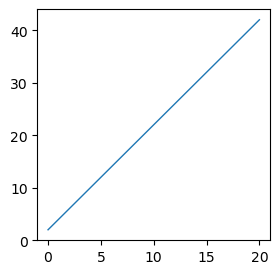

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



tspan = [0, 20]

x0 = np.array([2])

x = solve_ivp(f, tspan, x0, max_step=0.1)



plt.figure(figsize =(3, 3))
plt.plot(x.t , x.y[0, :], label = "Solucion numerica", lw = 1)

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [30]:
def f(X, t, w0):
    x = X[0]
    dx = X[1]
    d2x = -w0**2 * x
    return [dx, d2x]

x0 = 0.5
dx0 = 0.1
w0 = 3

t = np.linspace(0, 10, 1000)

sol = odeint(f, [x0, dx0], t, args=(w0,))
sol


array([[0.5       , 0.1       ],
       [0.50077542, 0.05491665],
       [0.50109927, 0.00978377],
       ...,
       [0.01414998, 1.50273033],
       [0.02918368, 1.50077821],
       [0.04419107, 1.4974728 ]])

Grafique

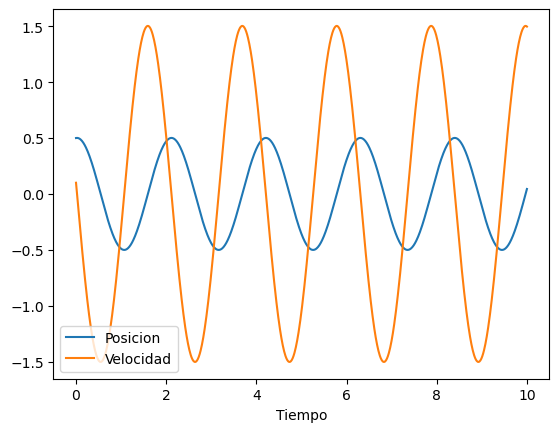

In [36]:
plt.plot(t, sol[:, 0], label="Posicion")
plt.plot(t, sol[:, 1], label="Velocidad")
plt.xlabel("Tiempo")
plt.legend()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [45]:
def posicion(t, w0, x0, v0):
    A = x0
    B = v0/w0

    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t, w0, x0, v0):
    A = x0
    B = v0/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

w0 = 3
x0 = 0.5
v0 = 0.1
t = np.linspace (0, 10, 1000)

p = posicion(t, w0, x0, v0)
v = velocidad(t, w0, x0, v0)



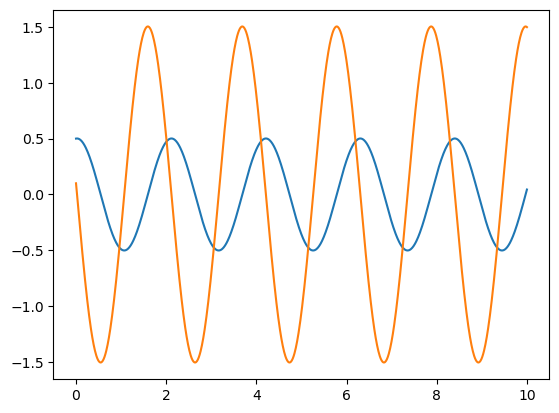

In [46]:
plt.plot(t, p, label="Posicion")
plt.plot(t, v, label="Velocidad")

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

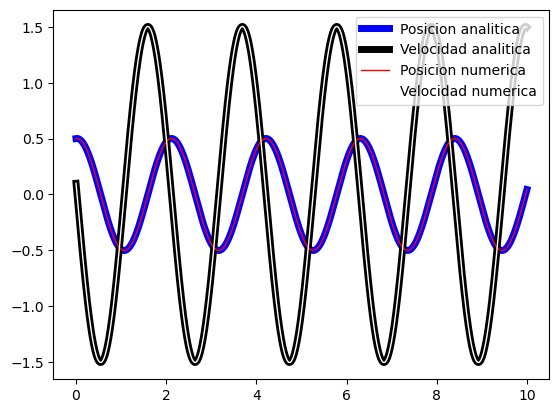

In [59]:
plt.plot(t, p, label="Posicion analitica", lw = 5, color = "b")
plt.plot(t, v, label="Velocidad analitica", lw = 5, color = "k")
plt.plot(t, sol[:, 0], label="Posicion numerica", lw = 1, color = "r")
plt.plot(t, sol[:, 1], label="Velocidad numerica", lw = 1, color = "w")
plt.legend()

